In [24]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

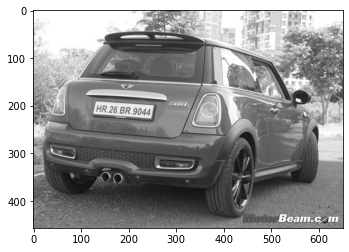

In [54]:
img = cv2.imread('image1.jpg')
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray,cv2.COLOR_BGR2RGB))



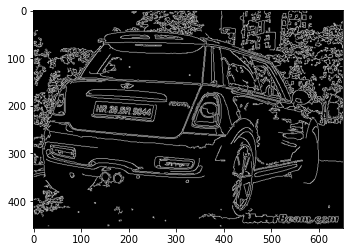

In [55]:
bfilter = cv2.bilateralFilter(gray,11,17,17)  #Noise Reduction
edged = cv2.Canny(bfilter,30,200)   #Edge Detection
plt.imshow(cv2.cvtColor(edged,cv2.COLOR_BGR2RGB))

In [63]:
keypoints = cv2.findContours(edged.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
contours= imutils.grab_contours(keypoints)
contours= sorted(contours,key=cv2.contourArea, reverse=True)[:10]

In [64]:
location = None
for contour in contours:
    approx= cv2.approxPolyDP(contour,5,True)
    if len(approx)==4:
        location = approx
        break
location

array([[[126, 216]],

       [[133, 191]],

       [[252, 200]],

       [[246, 227]]], dtype=int32)

In [65]:
mask = np.zeros(gray.shape,np.uint8)
new_image= cv2.drawContours(mask, [location], 0 , 255,-1)
new_image= cv2.bitwise_and(img, img, mask=mask)

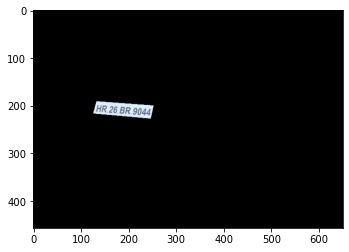

In [66]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [67]:
(x,y)= np.where(mask==255)
(x1,y1)=(np.min(x),np.min(y))
(x2,y2)=(np.max(x),np.max(y))
cropped_image= gray[x1:x2+1, y1:y2+1]

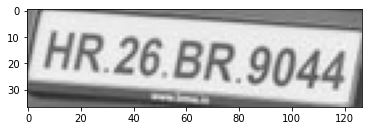

In [68]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [69]:
reader= easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[2, 4], [126, 4], [126, 34], [2, 34]], 'HR.26 BR.9044', 0.5781259495466393)]

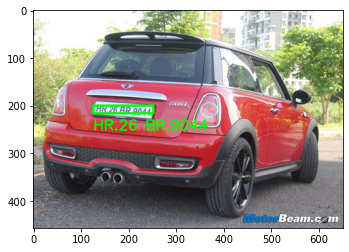

In [70]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))